In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

import itertools
import scipy

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFECV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data PreProcessing

In [2]:
df1 = pd.read_csv('OJ.csv')

In [3]:
df1.head()

,Unnamed: 0,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,CH
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,CH
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,CH
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,MM
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,CH


In [4]:
df1.dtypes

Unnamed: 0          int64
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7             object
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
Purchase           object
dtype: object

In [5]:
df1.isnull().sum()
df1.isna().sum()

Unnamed: 0        0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
Purchase          0
dtype: int64

Unnamed: 0        0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
Purchase          0
dtype: int64

In [6]:
df1['Purchase']=df1['Purchase'].astype('str')
df1['Store7']=df1['Store7'].astype('str')

In [7]:
df2=df1.drop(columns=['Unnamed: 0','STORE'])
df2['Store7'] = df2['Store7'].apply(lambda x:0 if x == 'No' else '1')
df2['Purchase'] = df2['Purchase'].apply(lambda x:1 if x == 'CH' else 0)
df2.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,Purchase
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,0
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,1


In [8]:
df2 = pd.get_dummies(data=df2, columns=['StoreID'])
df2 = df2.drop('Store7', 1)

In [9]:
df2.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,Purchase,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,237,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,1,0,0,0,0
1,239,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,1,0,0,0,0
2,245,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,1,0,0,0,0
3,227,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,0,1,0,0,0,0
4,228,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,1,0,0,0,0,1


In [10]:
scaler = MinMaxScaler()
data_minmaxscaled = scaler.fit_transform(df2)
df2 = pd.DataFrame(data_minmaxscaled, columns = df2.columns)
df2.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,Purchase,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,0.196078,0.150,0.500000,0.00,0.000,0.0,0.0,0.500021,0.727273,0.514286,0.694656,0.000000,0.000000,0.545455,1.0,1.0,0.0,0.0,0.0,0.0
1,0.235294,0.150,0.500000,0.00,0.375,0.0,1.0,0.600027,0.454545,0.514286,0.465649,0.375001,0.000000,0.545455,1.0,1.0,0.0,0.0,0.0,0.0
2,0.352941,0.425,0.666667,0.34,0.000,0.0,0.0,0.680033,0.818182,0.428571,0.816794,0.000000,0.361703,0.522727,1.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.000,0.000000,0.00,0.000,0.0,0.0,0.400015,0.454545,0.428571,0.511450,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
4,0.019608,0.000,0.000000,0.00,0.000,0.0,0.0,0.956585,0.454545,0.428571,0.511450,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
df3=df2.drop('Purchase',1)
y=df2.Purchase

df3.head()
y.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,0.196078,0.150,0.500000,0.00,0.000,0.0,0.0,0.500021,0.727273,0.514286,0.694656,0.000000,0.000000,0.545455,1.0,0.0,0.0,0.0,0.0
1,0.235294,0.150,0.500000,0.00,0.375,0.0,1.0,0.600027,0.454545,0.514286,0.465649,0.375001,0.000000,0.545455,1.0,0.0,0.0,0.0,0.0
2,0.352941,0.425,0.666667,0.34,0.000,0.0,0.0,0.680033,0.818182,0.428571,0.816794,0.000000,0.361703,0.522727,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.000,0.000000,0.00,0.000,0.0,0.0,0.400015,0.454545,0.428571,0.511450,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
4,0.019608,0.000,0.000000,0.00,0.000,0.0,0.0,0.956585,0.454545,0.428571,0.511450,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0


0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: Purchase, dtype: float64

# Feature Selection

# heat map of correlation of features

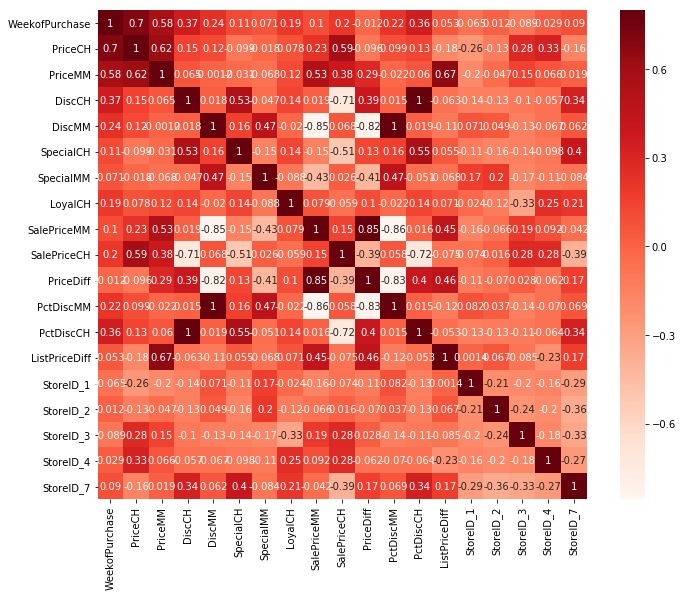

In [12]:
# heat map of correlation of features
correlation_matrix = df3.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True, cmap=plt.cm.Reds)
plt.show()


In [13]:
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= 0.8 or correlation_matrix.iloc[i,j] <= -0.8 :
            if columns[j]:
                columns[j] = False
selected_columns = df3.columns[columns]
df3 = df3[selected_columns]

In [14]:
df3.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceCH,ListPriceDiff,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,0.196078,0.150,0.500000,0.00,0.000,0.0,0.0,0.500021,0.514286,0.545455,1.0,0.0,0.0,0.0,0.0
1,0.235294,0.150,0.500000,0.00,0.375,0.0,1.0,0.600027,0.514286,0.545455,1.0,0.0,0.0,0.0,0.0
2,0.352941,0.425,0.666667,0.34,0.000,0.0,0.0,0.680033,0.428571,0.522727,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.000,0.000000,0.00,0.000,0.0,0.0,0.400015,0.428571,0.000000,1.0,0.0,0.0,0.0,0.0
4,0.019608,0.000,0.000000,0.00,0.000,0.0,0.0,0.956585,0.428571,0.000000,0.0,0.0,0.0,0.0,1.0


# RFECV

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=4000,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Logistic Regression CV score vs No of Features')

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (nb of correct classifications)')

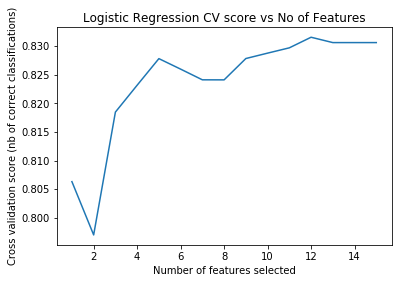

In [16]:
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(df3, y)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [17]:
feature_importance = list(zip(list(df3), rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)


X_new = df3[new_features]

['WeekofPurchase', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialMM', 'LoyalCH', 'SalePriceCH', 'ListPriceDiff', 'StoreID_2', 'StoreID_4', 'StoreID_7']


# SelectKBest

In [19]:
n = 12 
bestfeatures = SelectKBest(score_func=chi2,k=n)
fit = bestfeatures.fit(X_new,y)
dfscores = pd.DataFrame(fit.scores_) #save scores as pandas dataframe
dfcolumns = pd.DataFrame(X_new.columns) #save columns as pandas dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
#print all features, ranked from highest to lowest
with pd.option_context('display.max_rows',None, 'display.max_columns',None):
    print(featureScores.nlargest(n,'Score'))

           Feature      Score
6          LoyalCH  73.480455
11       StoreID_7  38.023303
5        SpecialMM  27.402799
10       StoreID_4  22.331385
3           DiscCH  18.690164
9        StoreID_2  15.364333
4           DiscMM  13.799846
8    ListPriceDiff   3.491767
0   WeekofPurchase   2.921886
2          PriceMM   1.810944
7      SalePriceCH   1.287928
1          PriceCH   0.083004


In [24]:
TFeatures = featureScores[featureScores.Score > 10].Feature
TFeatures

3        DiscCH
4        DiscMM
5     SpecialMM
6       LoyalCH
9     StoreID_2
10    StoreID_4
11    StoreID_7
Name: Feature, dtype: object

In [25]:
X= X_new[TFeatures]

# Training Dataset

In [26]:
X.head()

,DiscCH,DiscMM,SpecialMM,LoyalCH,StoreID_2,StoreID_4,StoreID_7
0,0.00,0.000,0.0,0.500021,0.0,0.0,0.0
1,0.00,0.375,1.0,0.600027,0.0,0.0,0.0
2,0.34,0.000,0.0,0.680033,0.0,0.0,0.0
3,0.00,0.000,0.0,0.400015,0.0,0.0,0.0
4,0.00,0.000,0.0,0.956585,0.0,0.0,1.0


# Train and Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2,test_size=0.3,shuffle=True,stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(749, 7)
(749,)
(321, 7)
(321,)


# Models


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=False):
    y_pred_dt = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_dt)

    #ax.plot([0, 1], [0, 1], 'k--');
    ax.plot([0, 1], [0, 1]);
    ax.plot(fpr, tpr, label='{}, AUC={:.5f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr,marker='*');

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=9, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

# Decision Tree without Tuning

In [242]:
model1= DecisionTreeClassifier(random_state=10)
model1.fit(X_train,y_train)
y_pred_dt=model1.predict(X_test)


print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_dt)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_dt)))
auc = roc_auc_score(y_test, y_pred_dt)
print("ROC AUC : %.2f" %(auc))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

Accuracy = 0.76
Kappa = 0.50
F1 Score = 0.80
ROC AUC : 0.75


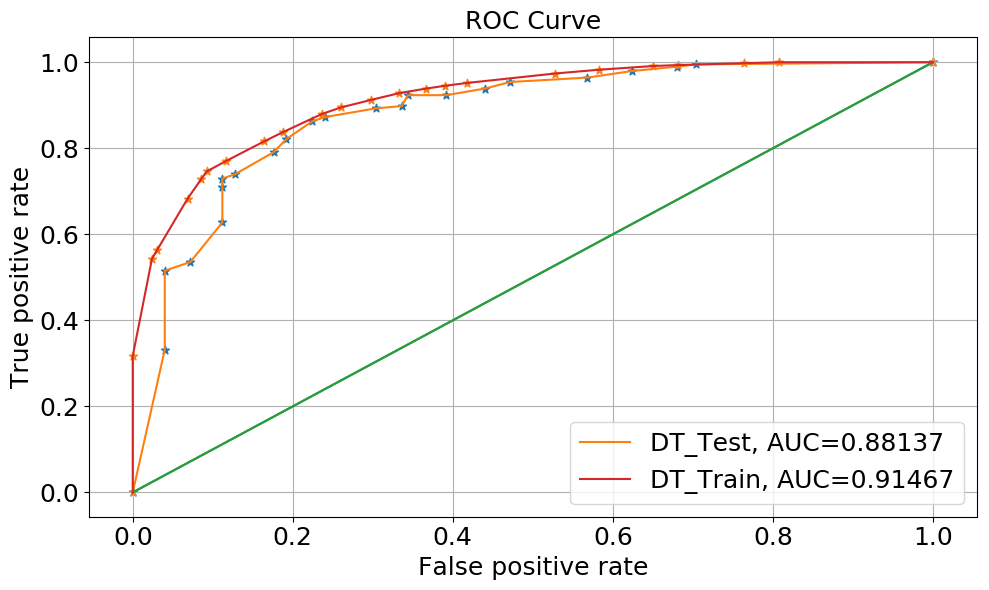

In [192]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(model1, X_test, y_test, "DT_Test", ax1)
plot_roc(model1, X_train, y_train, "DT_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# Decision Tree with Tuning - Grid Search CV

In [177]:
model= DecisionTreeClassifier(random_state=1234)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[11]}

dtmodel1 = GridSearchCV(model, param_grid=params, cv = 5, n_jobs=-1)
dtmodel1.fit(X_train,y_train)
print("Best Hyper Parameters:",dtmodel1.best_params_)

y_pred_rf2=model1.predict(X_test)

from sklearn import metrics


print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_rf2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_rf2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rf2)))
auc = roc_auc_score(y_test, y_pred_rf2)
print("ROC AUC : %5.5f" %(auc))

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1234,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 15, 'random_state': 11}
Accuracy = 0.81
Kappa = 0.60
F1 Score = 0.83
ROC AUC : 0.80996


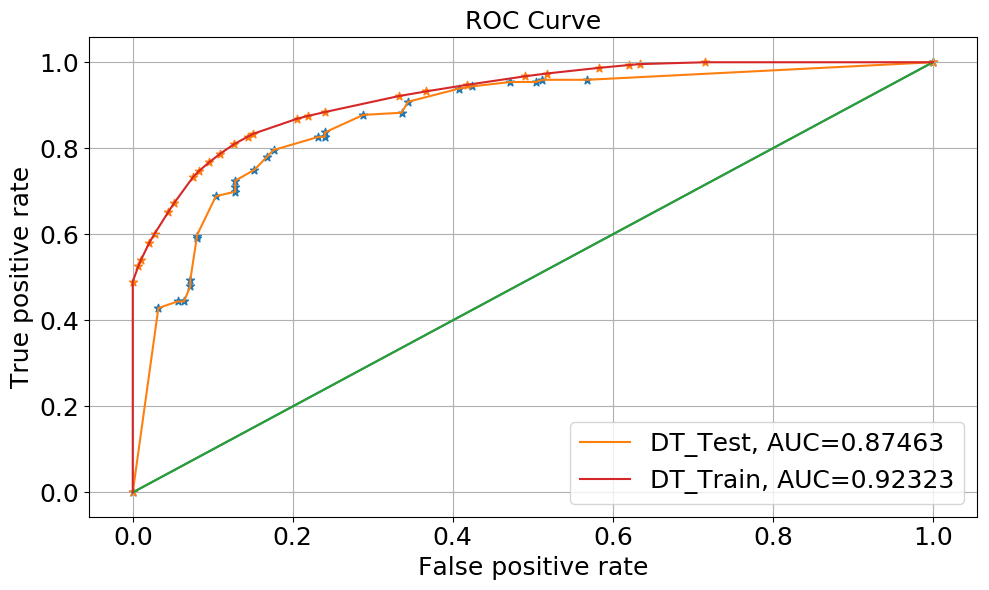

In [193]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(dtmodel1, X_test, y_test, "DT_Test", ax1)
plot_roc(dtmodel1, X_train, y_train, "DT_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier


RFmodel=RandomForestClassifier(n_jobs=-1,random_state=12)

RFmodel.fit(X_train,y_train)
y_pred_rf=RFmodel.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_rf)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rf)))
auc = roc_auc_score(y_test, y_pred_rf)
print("ROC AUC : %5.5f" %(auc))

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

Accuracy = 0.79
Kappa = 0.56
F1 Score = 0.83
ROC AUC : 0.77871


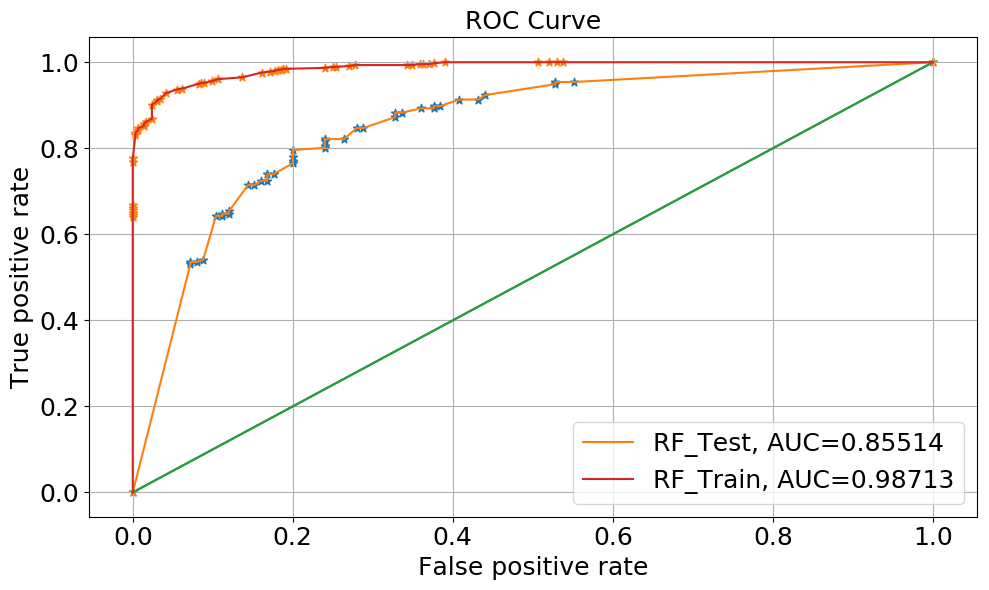

In [198]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(RFmodel, X_test, y_test, "RF_Test", ax1)
plot_roc(RFmodel, X_train, y_train, "RF_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# Random Forest Tuning with Grid Search CV

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

RFmodel=RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[13],
          'n_jobs':[-1]}

RFmodel2 = GridSearchCV(RFmodel, param_grid=params,scoring='roc_auc', cv=5, n_jobs=-1)

RFmodel2.fit(X_train,y_train)

print("Best Hyper Parameters:\n",RFmodel2.best_params_)

y_pred_rf2=RFmodel2.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_rf2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_rf2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_rf2)))
auc = roc_auc_score(y_test, y_pred_rf2)
print("ROC AUC : %5.5f" %(auc))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy = 0.82
Kappa = 0.63
F1 Score = 0.85
ROC AUC : 0.81547


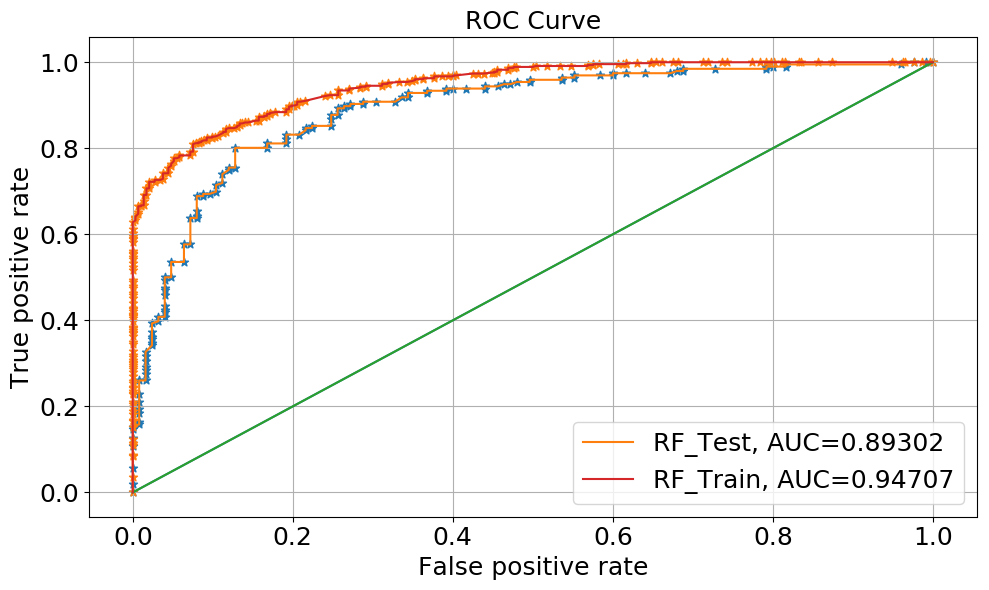

In [200]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(RFmodel2, X_test, y_test, "RF_Test", ax1)
plot_roc(RFmodel2, X_train, y_train, "RF_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# SVM 

In [230]:

from sklearn import svm

SVMmodel = svm.SVC(random_state=14)
SVMmodel.fit(X_train,y_train)
y_pred_svm=SVMmodel.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
auc = roc_auc_score(y_test, y_pred_svm)
print("ROC AUC : %5.5f" %(auc))

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=14,
    shrinking=True, tol=0.001, verbose=False)

Accuracy = 0.85
Kappa = 0.68
F1 Score = 0.88
ROC AUC : 0.83588


# SVM Tuning with GridSearchCV 

In [220]:

SVMmodel=svm.SVC()

params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf'],
          'random_state':[14]}

SVMmodel1 = GridSearchCV(SVMmodel, param_grid=params,scoring='roc_auc', cv=5, n_jobs=-1)

SVMmodel1.fit(X_train,y_train)

print("Best Hyper Parameters:\n",SVMmodel1.best_params_)

y_pred_svm2=SVMmodel1.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm2)))
auc = roc_auc_score(y_test, y_pred_svm2)
print("ROC AUC : %5.5f" %(auc))

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [6, 7, 8, 9, 10, 11, 12],
                         'kernel': ['linear', 'rbf'], 'random_state': [14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best Hyper Parameters:
 {'C': 6, 'kernel': 'rbf', 'random_state': 14}
Accuracy = 0.84
Kappa = 0.67
F1 Score = 0.87
ROC AUC : 0.83222


# KNN

In [211]:
from sklearn.neighbors import KNeighborsClassifier

KNNmodel = KNeighborsClassifier(n_jobs=-1)

KNNmodel.fit(X_train,y_train)
y_pred_knn=KNNmodel.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn)))
auc = roc_auc_score(y_test, y_pred_knn)
print("ROC AUC : %5.5f" %(auc))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy = 0.81
Kappa = 0.60
F1 Score = 0.85
ROC AUC : 0.79657


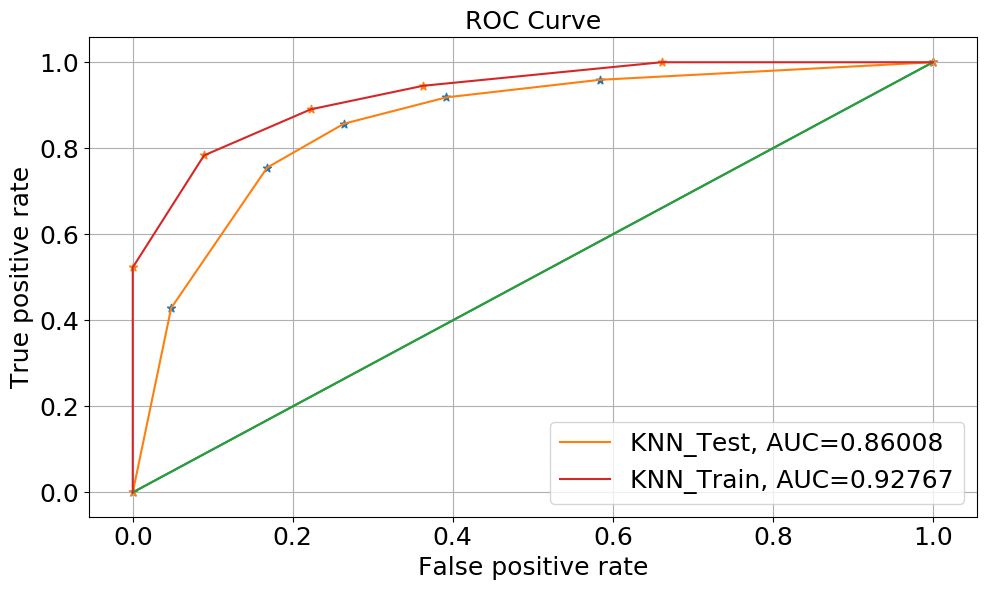

In [215]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(KNNmodel, X_test, y_test, "KNN_Test", ax1)
plot_roc(KNNmodel, X_train, y_train, "KNN_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# KNN Tuning with GridSearchCV

In [229]:
KNNmodel = KNeighborsClassifier(n_jobs=-1)

params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

KNNmodel1 = GridSearchCV(KNNmodel, param_grid=params, n_jobs=1)

KNNmodel1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",KNNmodel1.best_params_)

y_pred_knn2=KNNmodel1.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_knn2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_knn2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_knn2)))
auc = roc_auc_score(y_test, y_pred_knn2)
print("ROC AUC : %5.5f" %(auc))

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Best Hyper Parameters:
 {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}
Accuracy = 0.81
Kappa = 0.61
F1 Score = 0.84
ROC AUC : 0.81071


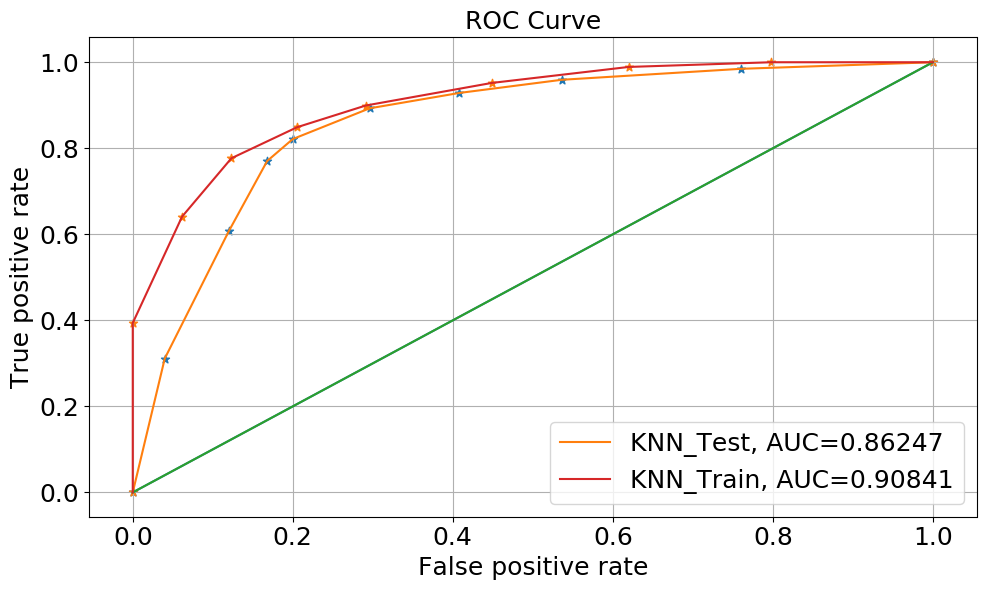

In [228]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(KNNmodel1, X_test, y_test, "KNN_Test", ax1)
plot_roc(KNNmodel1, X_train, y_train, "KNN_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# XGBOOST

In [149]:

from xgboost import XGBClassifier

XGB_classifier = XGBClassifier(n_estimators=16, max_depth=5)
XGB_classifier.fit(X_train, y_train)

# make predictions for test set
y_pred_xgb = XGB_classifier.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_xgb)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_xgb)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_xgb)))
auc = roc_auc_score(y_test, y_pred_xgb)
print("ROC AUC : %5.5f" %(auc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=16, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy = 0.83
Kappa = 0.64
F1 Score = 0.85
ROC AUC : 0.82237


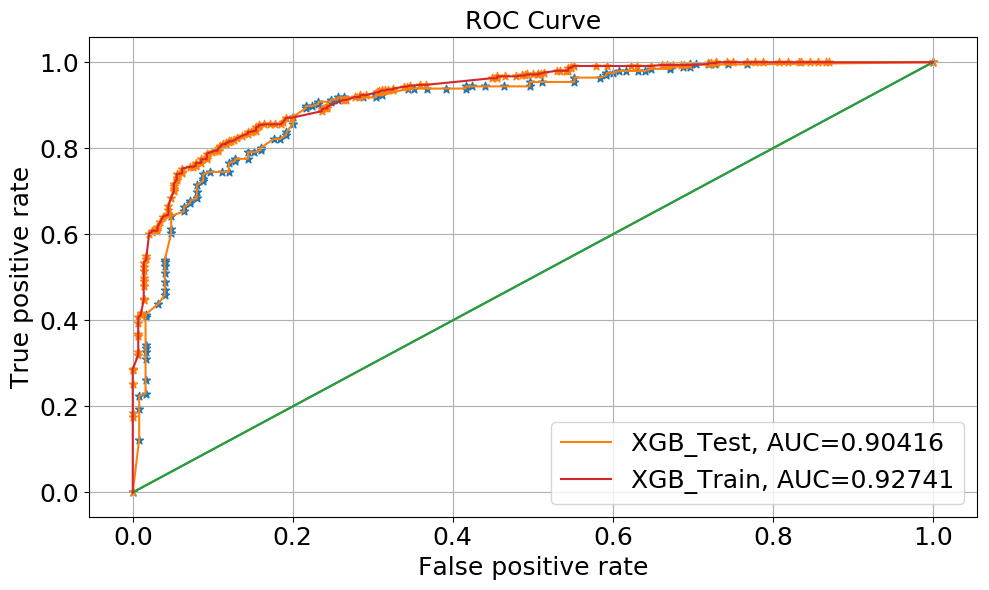

In [217]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(XGB_classifier, X_test, y_test, "XGB_Test", ax1)
plot_roc(XGB_classifier, X_train, y_train, "XGB_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# XGB Tuning with GridSearchCV

In [148]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=18)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]}

XGBmodel1 = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True)

XGBmodel1.fit(X_train,y_train)

print("Best Hyper Parameters:\n",XGBmodel1.best_estimator_)

y_pred_xgb2=XGBmodel1.predict(X_test)

print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_xgb2)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_xgb2)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_xgb2)))
auc = roc_auc_score(y_test, y_pred_xgb2)
print("ROC AUC : %5.5f" %(auc))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   18.7s
[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   20.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=18, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},

Best Hyper Parameters:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=18,
              silent=None, subsample=1, verbosity=1)
Accuracy = 0.84
Kappa = 0.66
F1 Score = 0.87
ROC AUC : 0.83402


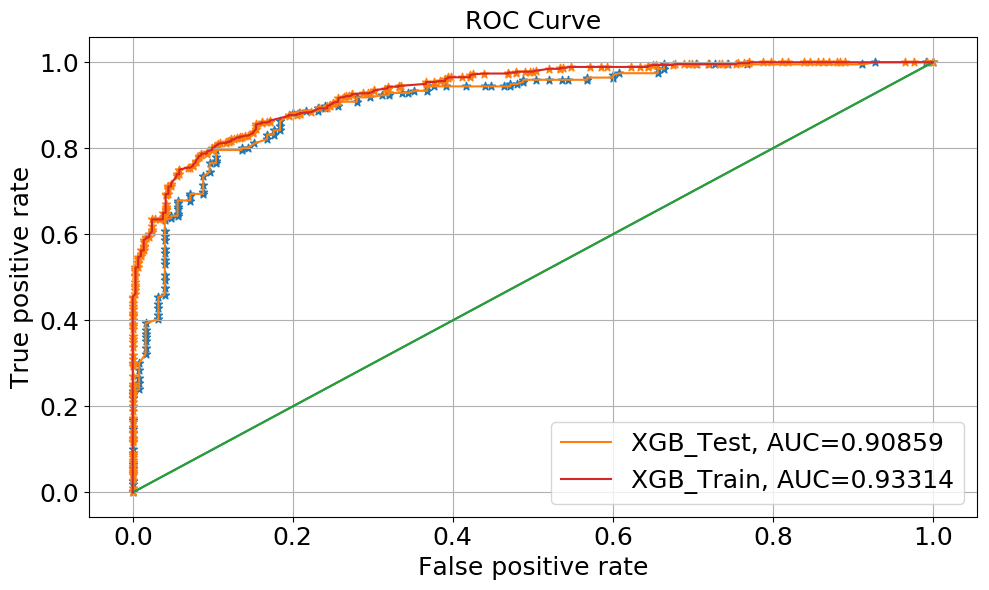

In [218]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(XGBmodel1, X_test, y_test, "XGB_Test", ax1)
plot_roc(XGBmodel1, X_train, y_train, "XGB_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# Logistic Regression


In [235]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression()

LRmodel.fit(X_train,y_train)
y_pred_lr=LRmodel.predict(X_test)

print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred_lr)))
print("Kappa = {:.3f}".format(cohen_kappa_score(y_test, y_pred_lr)))
print("F1 Score = {:.3f}".format(f1_score(y_test, y_pred_lr)))
auc = roc_auc_score(y_test, y_pred_lr)
print("ROC AUC : %5.5f" %(auc))

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy = 0.835
Kappa = 0.650
F1 Score = 0.866
ROC AUC : 0.82278


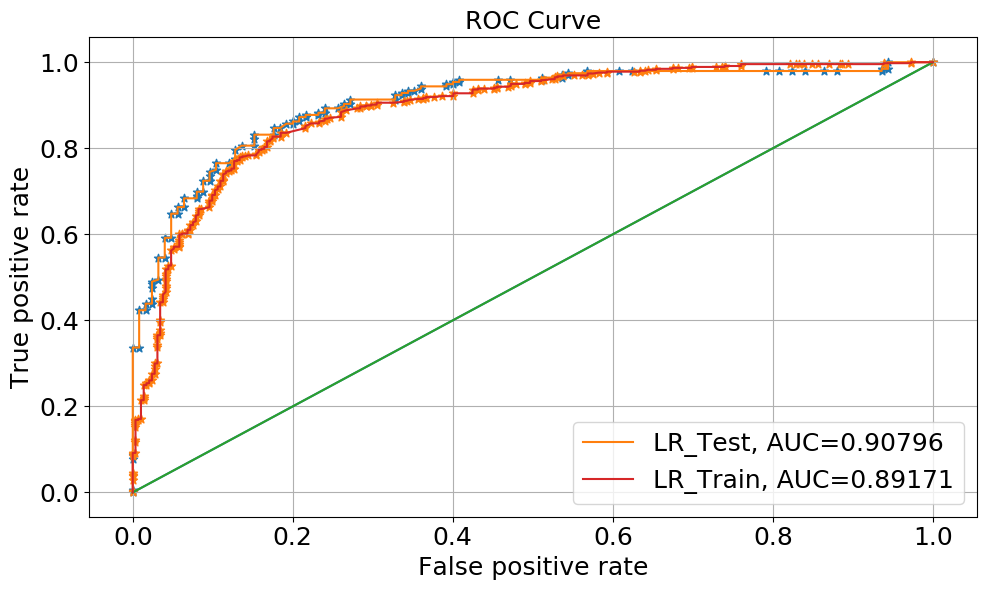

In [240]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(LRmodel, X_test, y_test, "LR_Test", ax1)
plot_roc(LRmodel, X_train, y_train, "LR_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

# LR Tuning with GridSearchCV

In [237]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
LRmodel2 = GridSearchCV(LR_classifier, param_grid = grid_values, cv=5, scoring = 'roc_auc')
LRmodel2.fit(X_train, y_train)

print("Best Hyper Parameters:\n",LRmodel2.best_estimator_)
y_pred_lr2 = LRmodel2.predict(X_test)
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred_lr2)))
print("Kappa = {:.3f}".format(cohen_kappa_score(y_test, y_pred_lr2)))
print("F1 Score = {:.3f}".format(f1_score(y_test, y_pred_lr2)))
auc = roc_auc_score(y_test, y_pred_lr2)
print("ROC AUC : %5.5f" %(auc))

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunpr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best Hyper Parameters:
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy = 0.835
Kappa = 0.651
F1 Score = 0.866
ROC AUC : 0.82422


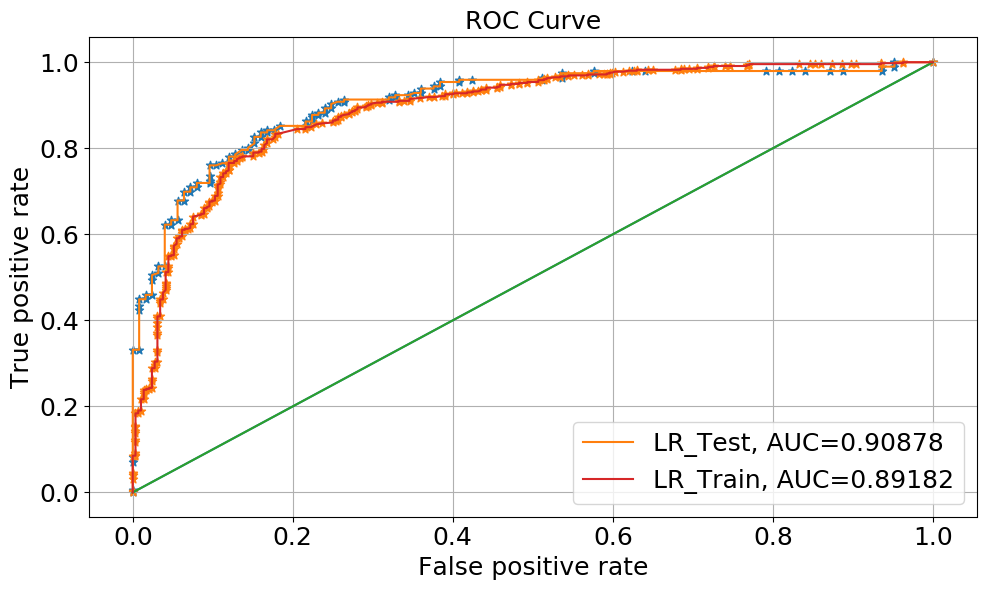

In [241]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax1 = plt.subplot(1, 1, 1);
plot_roc(LRmodel2, X_test, y_test, "LR_Test", ax1)
plot_roc(LRmodel2, X_train, y_train, "LR_Train", ax1)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();